# COVID-19 Data Analysis and Predictions

# 1. Import relevant libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


# 2. Cleaning the Data

In [4]:
df.shape

(36137, 36)

In [5]:
df = df[df['location']=='India']   #  to work with Indian Dataset

In [6]:
categorical_data=[]
numerical_data=[]
for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_data.append(i)
    else:
        numerical_data.append(i) #separating numerical and categorical data

In [7]:
numerical_data

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [8]:
for i in numerical_data:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mean(),inplace=True)  #filling missing values with the mean of respective feature

In [9]:
df.drop('tests_units',inplace=True,axis=1)

In [10]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
e

In [11]:
df = df.drop(['iso_code', 'continent', 'location','population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],axis=1) #dropping irrelevant columns

In [12]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)  

# 3. Exploring the data

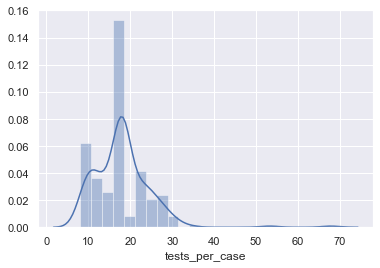

In [13]:
sns.distplot(df['tests_per_case'])

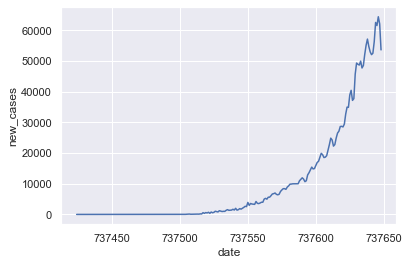

In [14]:
plt.plot(df['date'],df['new_cases'])
plt.xlabel('date')
plt.ylabel('new_cases')
plt.show()

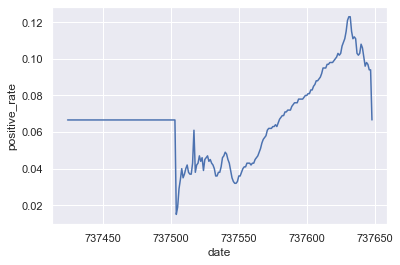

In [15]:
plt.plot(df['date'],df['positive_rate'])
plt.xlabel('date')
plt.ylabel('positive_rate')
plt.show()

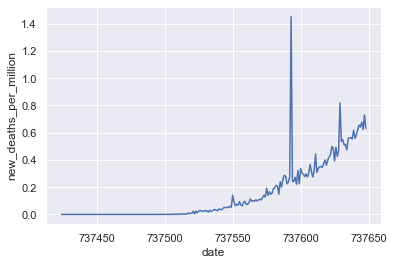

In [16]:
plt.plot(df['date'],df['new_deaths_per_million'])
plt.xlabel('date')
plt.ylabel('new_deaths_per_million')
plt.show()

In [17]:
X = df[['date','new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index']]

In [18]:
y = df['total_cases']

# 4. Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 47)

# 5. Creating a Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred = reg.predict(X_test)

In [25]:
reg.score(X_test,pred)

1.0

In [26]:
from sklearn import metrics

In [27]:
metrics.explained_variance_score(y_test,pred)

0.9999999999995491

# 6. Using Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
regressor = RandomForestRegressor(n_estimators=100,random_state=47)

In [30]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=47, verbose=0, warm_start=False)

In [31]:
predictions = regressor.predict(X_test)

In [32]:
regressor.score(X_test,predictions)

1.0

In [33]:
metrics.explained_variance_score(y_test,predictions)

0.9975872291610971

# Predicting the Total cases with date

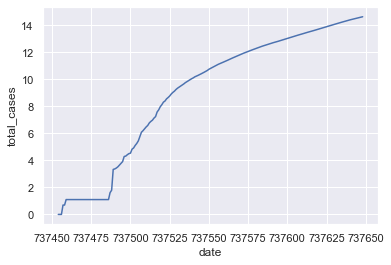

In [34]:
plt.plot(df['date'],np.log(df['total_cases']))
plt.xlabel('date')
plt.ylabel('total_cases')
plt.show()

In [35]:
#np.polyfit(np.log(df['date']), df['total_cases'], 1)

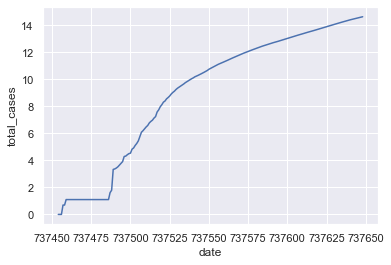

In [36]:
plt.plot(df['date'],np.log(df['total_cases']))
plt.xlabel('date')
plt.ylabel('total_cases')
plt.show()

In [37]:
df2 = df.copy()

In [38]:
df2['total_cases'] = round(np.log(df2['total_cases']),2)

In [39]:
df2['total_cases'] = df2['total_cases'].replace(-np.inf,np.nan)

In [40]:
df2.isnull().sum()

date                                0
total_cases                        30
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
new_tests                           0
total_tests                         0
total_tests_per_thousand            0
new_tests_per_thousand              0
new_tests_smoothed                  0
new_tests_smoothed_per_thousand     0
tests_per_case                      0
positive_rate                       0
stringency_index                    0
dtype: int64

In [41]:
df2 = df2.dropna()

In [42]:
reg2 = LinearRegression()

In [43]:
X = df2[['date']]

In [44]:
y = df2['total_cases']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
predictions2 = reg2.predict(X_test)

In [48]:
metrics.explained_variance_score(y_test,predictions2)

0.9060449098683733

In [49]:
i = input('Enter a date in format yyyy-mm-dd to predict the total number cases till that date ')

Enter a date to predict the total number cases till that date 2020-08-14


In [50]:
d = pd.DataFrame(columns={'date'},index={1})

In [51]:
d['date'] = i

In [52]:
d

,date
1,2020-08-14


In [53]:
df['date']

15134    737424
15135    737425
15136    737426
15137    737427
15138    737428
          ...  
15353    737644
15354    737645
15355    737646
15356    737647
15357    737648
Name: date, Length: 224, dtype: int64

In [54]:
d['date'] = pd.to_datetime(d['date'])
d['date'] = d['date'].map(dt.datetime.toordinal)

In [55]:
p = reg2.predict(d)

In [56]:
print(f'The total number of cases until {i} will be {np.exp(p)}')

The total number of cases until 2020-08-14 will be [24350232.10365492]
